In [61]:
# Swiggy Project -----------------------------------

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [63]:
df_Swiggy = pd.read_csv('Swiggy Bangalore Outlet Details.csv')
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [64]:
df_Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Shop_Name     118 non-null    object
 1   Cuisine       118 non-null    object
 2   Location      118 non-null    object
 3   Rating        118 non-null    object
 4   Cost_for_Two  118 non-null    object
dtypes: object(5)
memory usage: 4.7+ KB


In [65]:
df_Swiggy['Rating'].unique()

array(['4.3', '4.4', '4.1', '4.2', '3.9', '3.8', '4', '3.7', '3.6', '4.8',
       '4.5', '4.6', '--'], dtype=object)

In [66]:
# Replace '--' with 0
df_Swiggy['Rating'] = df_Swiggy['Rating'].str.replace('--','0').astype(float)

In [67]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,₹ 150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,₹ 400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,₹ 126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,₹ 400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,₹ 450


In [68]:
df_Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.7+ KB


In [69]:
s1 = '₹ 450'
s1.split()

['₹', '450']

In [70]:
s1 = '₹ 450'
s1.strip('₹')

' 450'

In [71]:
df_Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Shop_Name     118 non-null    object 
 1   Cuisine       118 non-null    object 
 2   Location      118 non-null    object 
 3   Rating        118 non-null    float64
 4   Cost_for_Two  118 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.7+ KB


In [72]:
df_Swiggy['Cost_for_Two']=df_Swiggy['Cost_for_Two'].apply(lambda x:int(x.strip('₹ ')))

In [73]:
df_Swiggy['Cost_for_Two'].dtype

dtype('int64')

In [74]:
df_Swiggy.head()

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450


In [75]:
# Distribution of 'Ratings':
df_valid_Ratings = df_Swiggy[df_Swiggy['Rating']>0]
df_valid_Ratings

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


<Axes: xlabel='Rating', ylabel='Density'>

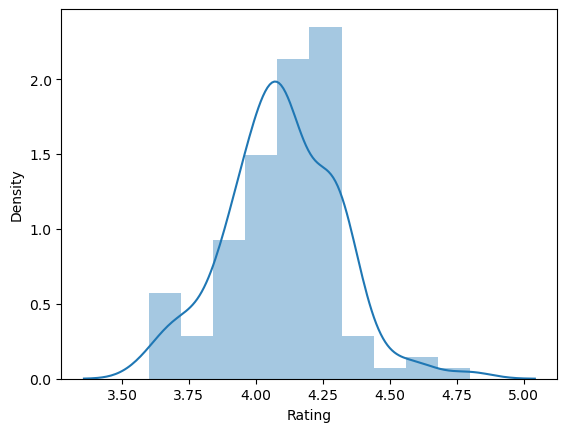

In [76]:
sns.distplot(df_valid_Ratings['Rating']) # Draw Distribution plot 

In [77]:
# Handling Feature --> Location
df_Swiggy['Location'].unique()

array(['Koramangala, Koramangala', 'Sector 5, HSR',
       '6th Block, Koramangala', 'HSR, HSR', '5th Block, Koramangala',
       'Koramangala 4th  Block, Koramangala', 'BTM 2nd Stage, BTM',
       'BTM, BTM', '9th Main road, Koramangala', 'outer ring road, BTM',
       '7th Block, Koramangala', '1st MAin, Koramangala',
       'Bommanahalli, BTM', '6th block, Koramangala', 'Sector 4, HSR',
       'BTM 1st stage, BTM', 'Jakkasandra Extn, Koramangala',
       'Marutinagar Main Road, BTM', '1st Block, Koramangala',
       '4th Cross, BTM', 'koramangala, Koramangala', 'BTM 2nd stage, BTM',
       '3rd main, BTM', 'HSR 1st sector, HSR', 'Sector 7, HSR',
       '3rd Sector, HSR', 'Chocolate Factory Road, BTM',
       '16th Main Road, 2nd Stage, BTM', '1st Stage, BTM',
       'Hosur Main Road, Koramangala',
       '1st Cross Road, 5th Block, Near Jyothi Nivas College, Koramangala',
       'Mico Layout, BTM', '4th Cross, Koramangala',
       '4th Block, Koramangala', 'Intermediate Ring Road, K

In [78]:
df_Swiggy['Location'].nunique()

65

In [79]:
# Locations that contains 'Koramangala'
swiggy_koramangala = df_Swiggy[df_Swiggy['Location'].str.contains('Koramangala')]
swiggy_koramangala

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
5,Kitchens of Punjab,North Indian,"Koramangala 4th Block, Koramangala",4.2,350
9,Yumlane Pizza,"Pizzas, Italian, Mexican","9th Main road, Koramangala",3.8,150
...,...,...,...,...,...
112,Kritunga,"Andhra, Biryani","5th Block, Koramangala",3.9,500
113,Wok Paper Scissors,"Pan-Asian, Chinese, Asian","JNC Road, Koramangala",3.9,219
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [80]:
swiggy_HSR = df_Swiggy[df_Swiggy['Location'].str.contains('HSR')]
swiggy_HSR

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
8,Hotel Manu,"South Indian, Kerala, Chinese, North Indian","HSR, HSR",4.1,350
19,Shree Khana Khazana,"Indian, Rajasthani","Sector 4, HSR",4.1,350
24,New Udupi Grand,"Chinese, Jain, North Indian, South Indian","HSR, HSR",4.3,150
36,Biriyani Zone,"North Indian, Chinese, Biryani","HSR 1st sector, HSR",4.1,600
37,Gongura's,"North Indian, Chinese, Biryani","Sector 7, HSR",3.8,300
39,Leon Grill,"Turkish, Portuguese, American","3rd Sector, HSR",4.3,300
41,Cakewala,Desserts,"HSR, HSR",4.3,450
57,Donne Biriyani House,South Indian,"3rd sector, HSR",4.0,300


In [81]:
swiggy_BTM = df_Swiggy[df_Swiggy['Location'].str.contains('BTM')]
swiggy_BTM

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
6,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,"Fast Food, North Indian, Chinese","BTM 2nd Stage, BTM",4.1,200
7,La Pino'z Pizza,Italian,"BTM, BTM",3.9,500
10,Ambur Star Briyani,"Chinese, South Indian, North Indian, Desserts,...","outer ring road, BTM",4.1,500
17,Sri Lakshmi Dhaba,North Indian,"Bommanahalli, BTM",3.7,200
20,Just Bake - Cakes & confectioners,"Desserts, Bakery","BTM 1st stage, BTM",4.3,300
22,Hotel Godavari,"North Indian, Chinese, Hyderabadi","Marutinagar Main Road, BTM",4.0,400
25,Swad Punjab da,Indian,"BTM, BTM",4.1,250
27,High N Hungry,"Andhra, Biryani, Chinese, Desserts, Fast Food,...","4th Cross, BTM",4.1,350
31,Bengali Fun Foods,North Indian,"BTM 2nd stage, BTM",4.2,300
33,Oottupura,"Kerala, South Indian","BTM, BTM",4.3,268


<Axes: xlabel='Rating', ylabel='Count'>

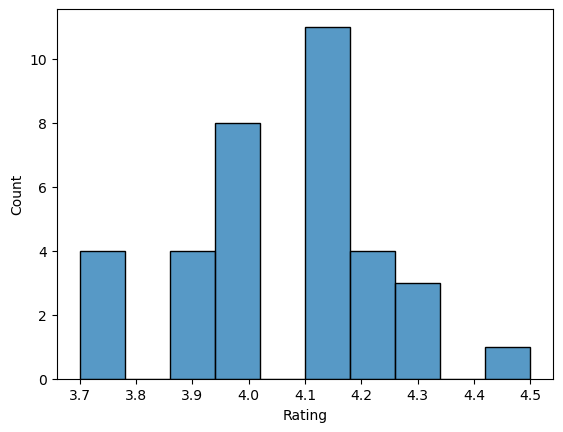

In [82]:
sns.histplot(swiggy_BTM['Rating'], bins =10) # bins is classes. Graph divides data in 10 bins.

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

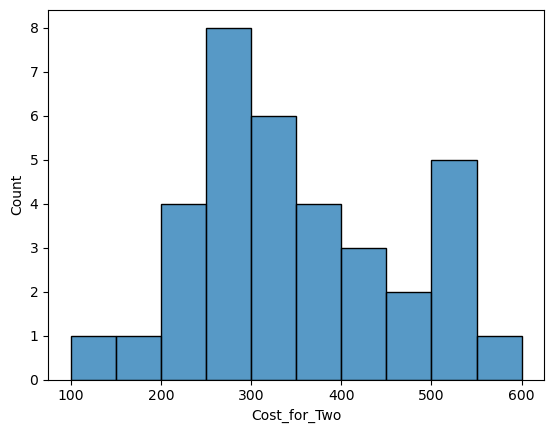

In [83]:
sns.histplot(swiggy_BTM['Cost_for_Two'], bins =10)

In [84]:
# Conclusion --> BTM: Most has 4.0 to 4.2 Rating and Approx. Cost for Two People lies between 200 to 350.(Max. Cost goes upto 600)

<Axes: xlabel='Rating', ylabel='Count'>

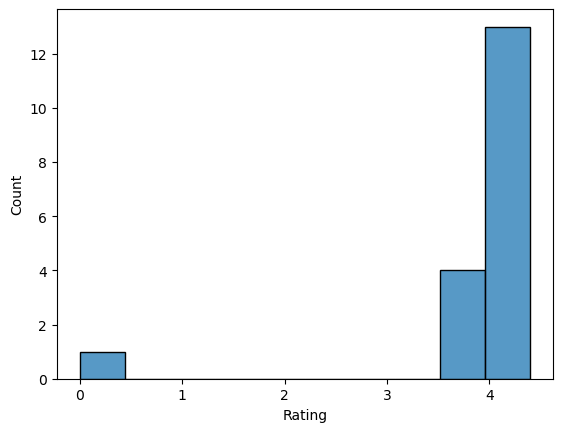

In [85]:
# HSR Area --
sns.histplot(swiggy_HSR['Rating'], bins = 10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

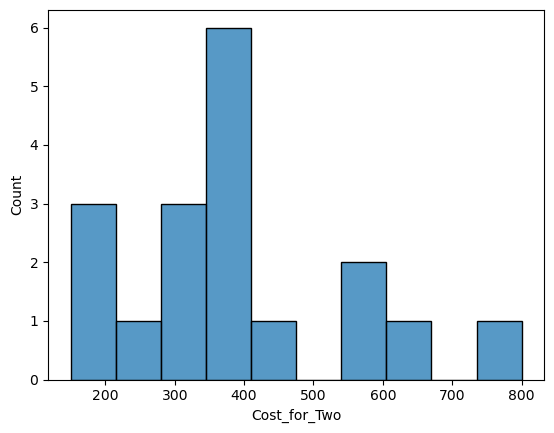

In [86]:
sns.histplot(swiggy_HSR['Cost_for_Two'], bins = 10)

In [87]:
# Conclusion --> HSR: Most has 4 or above Rating and Approx. Cost for Two People lies between 300 to 400.(Max. Cost goes upto 800)

<Axes: xlabel='Rating', ylabel='Count'>

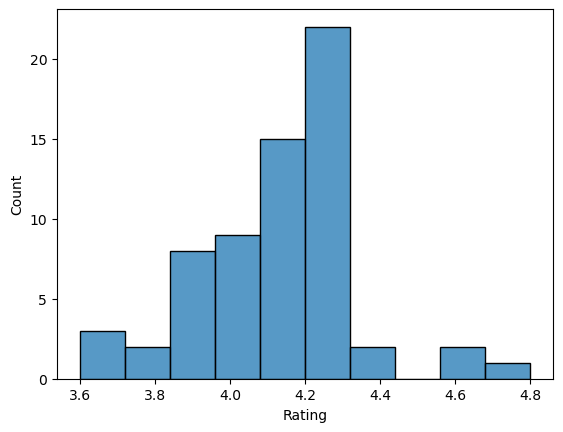

In [88]:
# Koramangala Area
sns.histplot(swiggy_koramangala['Rating'], bins=10)

<Axes: xlabel='Cost_for_Two', ylabel='Count'>

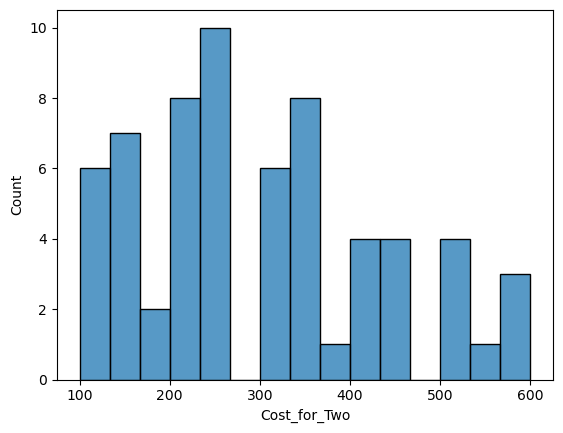

In [89]:
sns.histplot(swiggy_koramangala['Cost_for_Two'], bins = 15)

In [90]:
# Conclusion --> Koramangala: Most has 4.0 to 4.3 Rating and Approx. Cost for Two People lies between 200 to 350.(Max. Cost goes upto 600)

In [91]:
# Q Analyse 'Approx Cost of 2 People' vs 'Rating'. Find out the relationship between them.
df_Highest_Rated_Restaurants = df_Swiggy[df_Swiggy['Rating'] >= 4.0]
df_Highest_Rated_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
114,Savoury Restaurant,"Arabian, Middle Eastern, North Indian, Grill, ...","Madiwala, BTM",4.1,600
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [92]:
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.loc[:, ['Shop_Name', 'Rating', 'Cost_for_Two']]
df_Highest_Rated_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,Kanti Sweets,4.3,150
1,Mumbai Tiffin,4.4,400
2,Sri Krishna sagar,4.1,126
3,Al Daaz,4.4,400
4,Beijing Bites,4.1,450
...,...,...,...
111,Bowl 99,4.4,200
114,Savoury Restaurant,4.1,600
115,Royal Treat,4.2,193
116,Thali 99,4.3,200


In [93]:
df_Highest_Rated_Restaurants.groupby(['Shop_Name', 'Rating'])['Cost_for_Two'].agg('mean').reset_index

<bound method Series.reset_index of Shop_Name                                             Rating
99 VARIETY DOSA AND JUICE-Malli mane food court       4.1       100.0
99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food Court  4.1       200.0
A2B - Adyar Ananda Bhavan                             4.2       450.0
Abhiruchi Hotel                                       4.0       250.0
Al Daaz                                               4.4       400.0
                                                                ...  
Venu's Donne Biryani                                  4.3       300.0
WarmOven Cake & Desserts                              4.1       200.0
World of asia                                         4.0       250.0
XO Belgian Waffle                                     4.3       250.0
calicut cafe restaurant                               4.1       280.0
Name: Cost_for_Two, Length: 91, dtype: float64>

In [94]:
df_Highest_Rated_Restaurants.groupby(['Shop_Name', 'Rating'])['Cost_for_Two'].agg('mean').reset_index()

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [95]:
# Grouping on Shop_Name and Rating
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.groupby(['Shop_Name', 'Rating'])['Cost_for_Two'].agg('mean')
df_Highest_Rated_Restaurants = df_Highest_Rated_Restaurants.reset_index()
df_Highest_Rated_Restaurants 

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
86,Venu's Donne Biryani,4.3,300.0
87,WarmOven Cake & Desserts,4.1,200.0
88,World of asia,4.0,250.0
89,XO Belgian Waffle,4.3,250.0


In [96]:
fig = px.scatter( 
    x = df_Highest_Rated_Restaurants['Cost_for_Two'],
    y = df_Highest_Rated_Restaurants['Rating'],
    color = df_Highest_Rated_Restaurants['Rating'],
    size = df_Highest_Rated_Restaurants['Cost_for_Two'],
    labels = { 
        'x' : 'Approx. Cost_for_Two',
        'y' : 'Rating',
        'color' : 'Rating_Indicator'
    }
)
fig.update_layout(
    template = 'plotly_dark',
    title = "Analyse 'Approx Cost of 2 People' vs 'Rating' "
)

fig.show()


In [97]:
# Q Analyse Affordable/Budgeted and Highest Rated Restaurants of Bangalore:
df_Affordable_Restaurants = df_Swiggy[(df_Swiggy['Cost_for_Two'] <= 500) & (df_Swiggy['Rating'] >= 4.0)]
df_Affordable_Restaurants

,Shop_Name,Cuisine,Location,Rating,Cost_for_Two
0,Kanti Sweets,Sweets,"Koramangala, Koramangala",4.3,150
1,Mumbai Tiffin,"North Indian, Home Food, Thalis, Combo","Sector 5, HSR",4.4,400
2,Sri Krishna sagar,"South Indian, North Indian, Fast Food, Beverag...","6th Block, Koramangala",4.1,126
3,Al Daaz,"American, Arabian, Chinese, Desserts, Fast Foo...","HSR, HSR",4.4,400
4,Beijing Bites,"Chinese, Thai","5th Block, Koramangala",4.1,450
...,...,...,...,...,...
110,Biryani Pot,"North Indian, Biryani","Madiwala Junction, BTM",4.0,500
111,Bowl 99,"North Indian, South Indian","kormangala, Koramangala",4.4,200
115,Royal Treat,"North Indian, Chinese, Seafood, Biryani","5th block Koramangala, Koramangala",4.2,193
116,Thali 99,North Indian,"Koramangala, Koramangala",4.3,200


In [98]:
df_Affordable_Restaurants = df_Affordable_Restaurants.groupby(["Shop_Name", "Rating"])["Cost_for_Two"].agg("mean")
df_Affordable_Restaurants = df_Affordable_Restaurants.reset_index()
df_Affordable_Restaurants

,Shop_Name,Rating,Cost_for_Two
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
1,99 VARIETY DOSA AND PAV BHAJI- Malli Mane Food...,4.1,200.0
2,A2B - Adyar Ananda Bhavan,4.2,450.0
3,Abhiruchi Hotel,4.0,250.0
4,Al Daaz,4.4,400.0
...,...,...,...
76,Venu's Donne Biryani,4.3,300.0
77,WarmOven Cake & Desserts,4.1,200.0
78,World of asia,4.0,250.0
79,XO Belgian Waffle,4.3,250.0


In [99]:
df_Affordable_Restaurants.sort_values(by=["Rating"], ascending = False, inplace = True) # ascending = False means decending.
df_Affordable_Restaurants

,Shop_Name,Rating,Cost_for_Two
41,Khichdi Experiment,4.8,200.0
54,Natural Ice Cream,4.6,150.0
21,Corner House Ice Cream,4.6,250.0
20,Chinese Bae,4.5,450.0
50,Mumbai Tiffin,4.4,400.0
...,...,...,...
55,New Tasty Cafeteria,4.0,350.0
53,Nandhana Palace,4.0,500.0
52,Nanda's,4.0,400.0
45,Maa Di Hatti,4.0,129.0


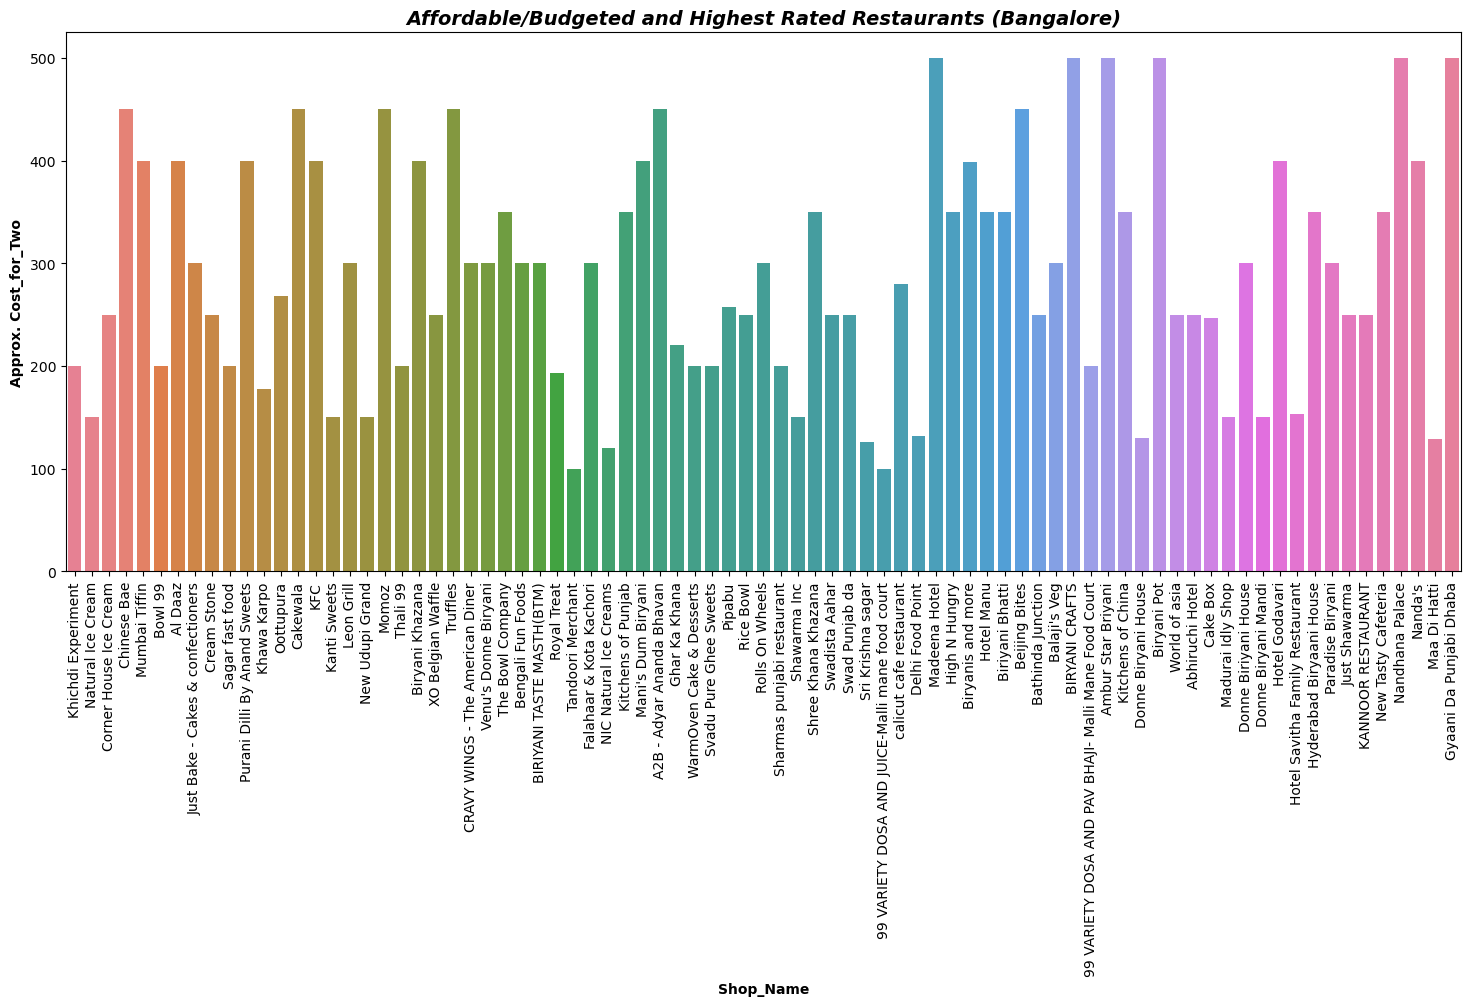

In [100]:
# Plot a "Bar Chart"
plt.figure(figsize=(18, 7))
sns.barplot(
    x = df_Affordable_Restaurants['Shop_Name'],
    y = df_Affordable_Restaurants["Cost_for_Two"],
    data = df_Affordable_Restaurants,  palette="husl"
)
plt.title(
    "Affordable/Budgeted and Highest Rated Restaurants (Bangalore)",
    fontsize = 14,
    fontweight = "bold",
    fontstyle = "italic"
)
plt.xlabel("Shop_Name", fontsize=10, fontweight="bold")
plt.ylabel("Approx. Cost_for_Two", fontsize = 10, fontweight = "bold")
plt.xticks(rotation = 90)
plt.show()

In [101]:
# Top 15 Cheapest and Highest Rated Restaurants with Approx. Cost for 2 people.
df_Cheapest_Restaurants = df_Affordable_Restaurants.sort_values(by = "Cost_for_Two", ascending = True)
df_Cheapest_Restaurants

,Shop_Name,Rating,Cost_for_Two
72,Tandoori Merchant,4.2,100.0
0,99 VARIETY DOSA AND JUICE-Malli mane food court,4.1,100.0
51,NIC Natural Ice Creams,4.2,120.0
68,Sri Krishna sagar,4.1,126.0
45,Maa Di Hatti,4.0,129.0
...,...,...,...
5,Ambur Star Briyani,4.1,500.0
7,BIRYANI CRAFTS,4.1,500.0
53,Nandhana Palace,4.0,500.0
46,Madeena Hotel,4.1,500.0


In [102]:
# Bar chart
fig = px.bar(
    data_frame = df_Cheapest_Restaurants.head(15), 
    x = df_Cheapest_Restaurants["Shop_Name"][0:15],
    y = df_Cheapest_Restaurants["Cost_for_Two"][0:15],
    color = df_Cheapest_Restaurants["Rating"][0:15],
    labels = {
        "x" : "Restaurant_Name",
        "y" : "Approx. Cost_for_Two",
        "color" : "Rating",
    }
)

fig.update_layout(
    template = "plotly_dark",
    title = "Top 15 Cheapest & Highest Rated Restaurants with Approx. Cost for 2 Pople",
)
fig.show()

In [103]:
# Top 15 Expensive
df_Expensive_Restaurants = df_Highest_Rated_Restaurants.sort_values(
    by = "Cost_for_Two", ascending = False )
df_Expensive_Restaurants



,Shop_Name,Rating,Cost_for_Two
67,Punjabi Rasoi,4.0,800.0
26,Dindigul Thalapakatti Biriyani,4.1,650.0
73,Savoury Restaurant,4.1,600.0
81,Taco Bell,4.3,600.0
66,Pizza Hut,4.0,600.0
...,...,...,...
49,Maa Di Hatti,4.0,129.0
77,Sri Krishna sagar,4.1,126.0
56,NIC Natural Ice Creams,4.2,120.0
82,Tandoori Merchant,4.2,100.0


In [104]:
fig = px.bar(
    data_frame = df_Expensive_Restaurants.head(15), 
    x = df_Expensive_Restaurants["Shop_Name"][0:15],
    y = df_Expensive_Restaurants["Cost_for_Two"][0:15],
    color = df_Expensive_Restaurants["Rating"][0:15],
    labels = {
        "x" : "Restaurant_Name",
        "y" : "Approx. Cost_for_Two",
        "color" : "Rating",
    }
)

fig.update_layout(
    template = "plotly_dark",
    title = "Top 15 Expensive & Highest Rated Restaurants with Approx. Cost for 2 Pople",
)
fig.show()

In [105]:
df_Swiggy["Cuisine"] = df_Swiggy["Cuisine"].str.title()
df_Swiggy["Cuisine"]

0                                                 Sweets
1                 North Indian, Home Food, Thalis, Combo
2      South Indian, North Indian, Fast Food, Beverag...
3      American, Arabian, Chinese, Desserts, Fast Foo...
4                                          Chinese, Thai
                             ...                        
113                            Pan-Asian, Chinese, Asian
114    Arabian, Middle Eastern, North Indian, Grill, ...
115              North Indian, Chinese, Seafood, Biryani
116                                         North Indian
117                                      Andhra, Biryani
Name: Cuisine, Length: 118, dtype: object

In [106]:
df_Swiggy["Cuisine"].unique()

array(['Sweets', 'North Indian, Home Food, Thalis, Combo',
       'South Indian, North Indian, Fast Food, Beverages, Jain',
       'American, Arabian, Chinese, Desserts, Fast Food, Mughlai, North Indian',
       'Chinese, Thai', 'North Indian',
       'Fast Food, North Indian, Chinese', 'Italian',
       'South Indian, Kerala, Chinese, North Indian',
       'Pizzas, Italian, Mexican',
       'Chinese, South Indian, North Indian, Desserts, Fast Food, Kerala, Andhra, Beverages, Mughlai, Seafood',
       'Desserts', 'Chinese, Andhra, Biryani, Seafood', 'Chinese',
       'South Indian, Chinese, Desserts, North Indian',
       'Arabian, Fast Food', 'Desserts, Beverages', 'Indian, Rajasthani',
       'Desserts, Bakery', 'Chinese, Healthy Food, North Indian',
       'North Indian, Chinese, Hyderabadi', 'Fast Food',
       'Chinese, Jain, North Indian, South Indian', 'Indian',
       'North Indian, South Indian, Chinese',
       'Andhra, Biryani, Chinese, Desserts, Fast Food, Seafood, South In

In [107]:
# print a disctionary from user input
x = {}
for i in range(10):
    name = input("enter the name")
    if name in x:
        x[name] = x[name]+1
    else:
        x[name] = 1
print(x)

enter the name abhishek
enter the name abhishek
enter the name abhishek
enter the name manas
enter the name abuzar
enter the name prashant
enter the name bhoomi
enter the name prashant
enter the name manas
enter the name prashant


{'abhishek': 3, 'manas': 2, 'abuzar': 1, 'prashant': 3, 'bhoomi': 1}


In [108]:
# This method apply on This project

freq_dict = {}
for i in df_Swiggy["Cuisine"].unique():
    Cuisine_Lists = i.split(",")  # words list
    for Cuisine in Cuisine_Lists:
        Cuisine = Cuisine.lstrip(" ")  # remove left space
        if Cuisine in freq_dict:
            freq_dict[Cuisine] = freq_dict[Cuisine] +1
        else:
            freq_dict[Cuisine] = 1

print(freq_dict)
print()
print("Total Records: \t", len(freq_dict))

{'Sweets': 2, 'North Indian': 32, 'Home Food': 2, 'Thalis': 1, 'Combo': 1, 'South Indian': 23, 'Fast Food': 16, 'Beverages': 9, 'Jain': 2, 'American': 8, 'Arabian': 4, 'Chinese': 35, 'Desserts': 15, 'Mughlai': 7, 'Thai': 2, 'Italian': 4, 'Kerala': 6, 'Pizzas': 5, 'Mexican': 3, 'Andhra': 12, 'Seafood': 8, 'Biryani': 18, 'Indian': 5, 'Rajasthani': 1, 'Bakery': 2, 'Healthy Food': 4, 'Hyderabadi': 5, 'Snacks': 4, 'Turkish': 2, 'Portuguese': 2, 'Chaat': 2, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 2, 'Juices': 2, 'Kebabs': 2, 'Grill': 2, 'Ice Cream': 2, 'Tandoor': 1, 'Chettinad': 2, 'Pan-Asian': 2, 'Oriental': 1, 'Middle Eastern': 1}

Total Records: 	 48


In [110]:
# Extracitng Cuisines name and there frequency
Cuisine = freq_dict.keys()
freq = freq_dict.values()

df_Cuisine_Analysis = pd.DataFrame()

# Creating a dataframe having two features --> Cuisine and Count
df_Cuisine_Analysis["Cuisine"] = Cuisine
df_Cuisine_Analysis["Count"] = freq

df_Cuisine_Analysis

,Cuisine,Count
0,Sweets,2
1,North Indian,32
2,Home Food,2
3,Thalis,1
4,Combo,1
5,South Indian,23
6,Fast Food,16
7,Beverages,9
8,Jain,2
9,American,8


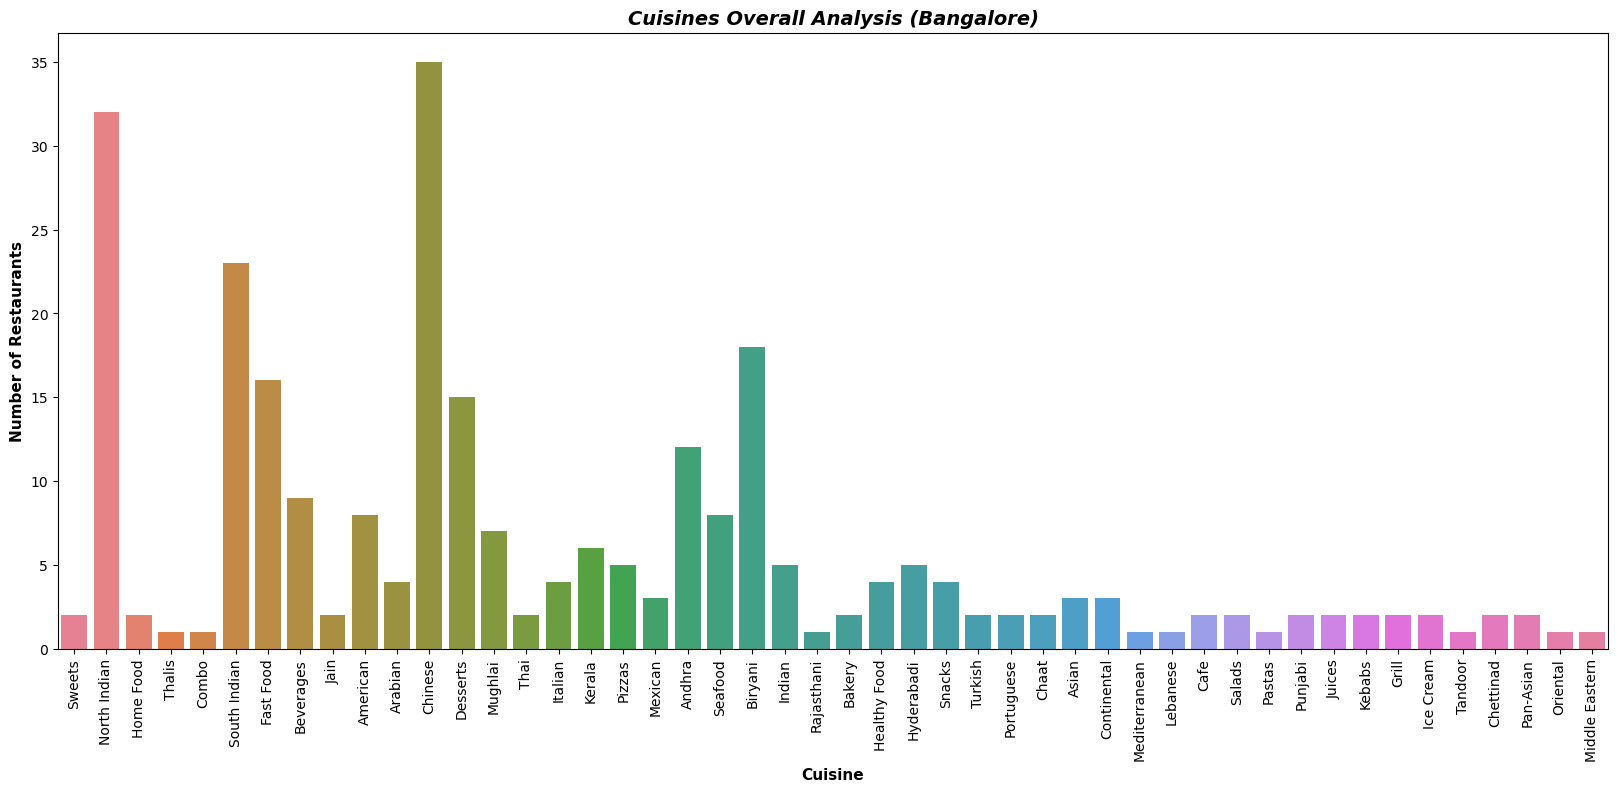

In [112]:
# Bar Chart on X and Y
plt.figure(figsize = (20,8))
sns.barplot(
    x = df_Cuisine_Analysis["Cuisine"],
    y = df_Cuisine_Analysis["Count"],
    data = df_Cuisine_Analysis, palette="husl"
)
plt.xticks(rotation = 90)
plt.title(
    "Cuisines Overall Analysis (Bangalore)",
    fontsize = 14,
    fontweight = "bold",
    fontstyle = "italic",
    
)
plt.xlabel("Cuisine", fontsize = 11, fontweight = "bold")
plt.ylabel("Number of Restaurants", fontsize = 11, fontweight = "bold")
plt.show()

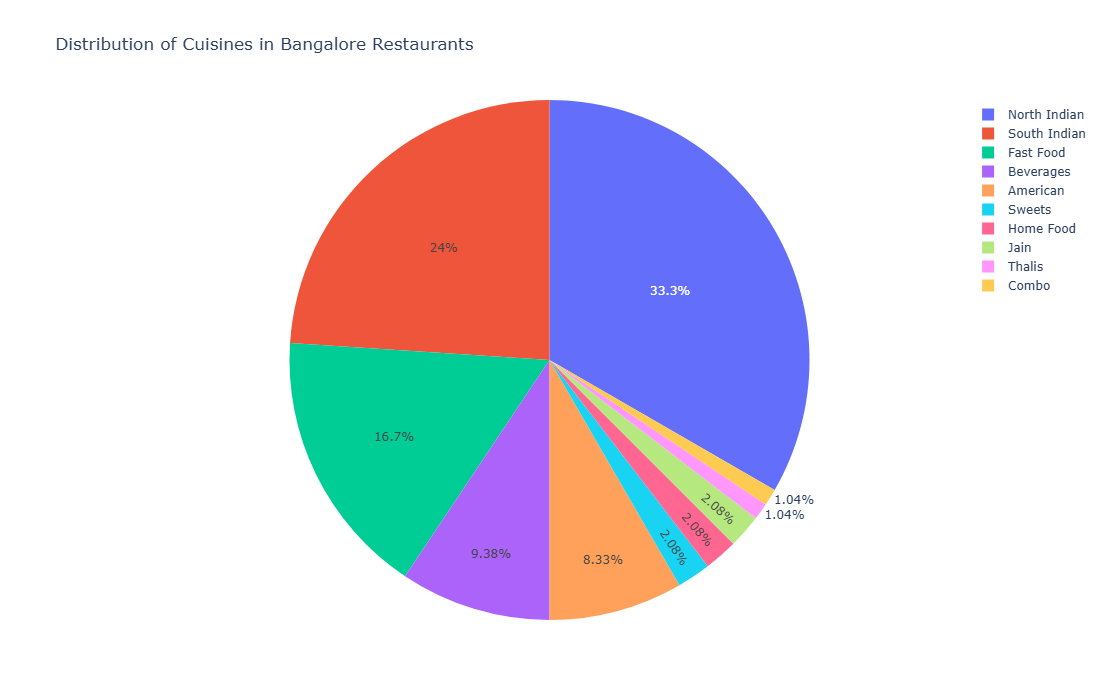

In [113]:
# Pie Chart
fig = px.pie(
    data_frame = df_Cuisine_Analysis.head(10),
    names= df_Cuisine_Analysis["Cuisine"][:10],
    values = df_Cuisine_Analysis["Count"][:10],
    title = "Distribution of Cuisines in Bangalore Restaurants", width = 700, height = 700
)
# fig.update_traces(textposition = "inside", textinfo = "percent+Label")
fig.show()

In [114]:
freq_BTM = {}
for i in swiggy_BTM["Cuisine"].unique():
    Cuisine_List = i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_BTM:
            freq_BTM[Cuisine] = freq_BTM[Cuisine] + 1
        else:
            freq_BTM[Cuisine] = 1

print(freq_BTM)
print()
print(len(freq_BTM))

{'Fast Food': 6, 'North Indian': 16, 'Chinese': 18, 'Italian': 1, 'South Indian': 10, 'Desserts': 6, 'Kerala': 4, 'Andhra': 7, 'Beverages': 4, 'Mughlai': 3, 'Seafood': 3, 'Bakery': 1, 'Hyderabadi': 4, 'Indian': 2, 'Biryani': 8, 'Snacks': 1, 'Sweets': 1, 'Chaat': 1, 'Arabian': 2, 'Thai': 1, 'Tandoor': 1, 'Punjabi': 1, 'Healthy Food': 1, 'Chettinad': 1, 'Middle Eastern': 1, 'Grill': 1}

26


In [115]:
# same as upper code ---> extract data of Cuisine_BTM
Cuisine = freq_BTM.keys()
freq = freq_BTM.values()

dict_BTM = {"Cuisine" : Cuisine, "Count": freq}
df_Cuisine_BTM = pd.DataFrame(dict_BTM)
df_Cuisine_BTM.head()

,Cuisine,Count
0,Fast Food,6
1,North Indian,16
2,Chinese,18
3,Italian,1
4,South Indian,10


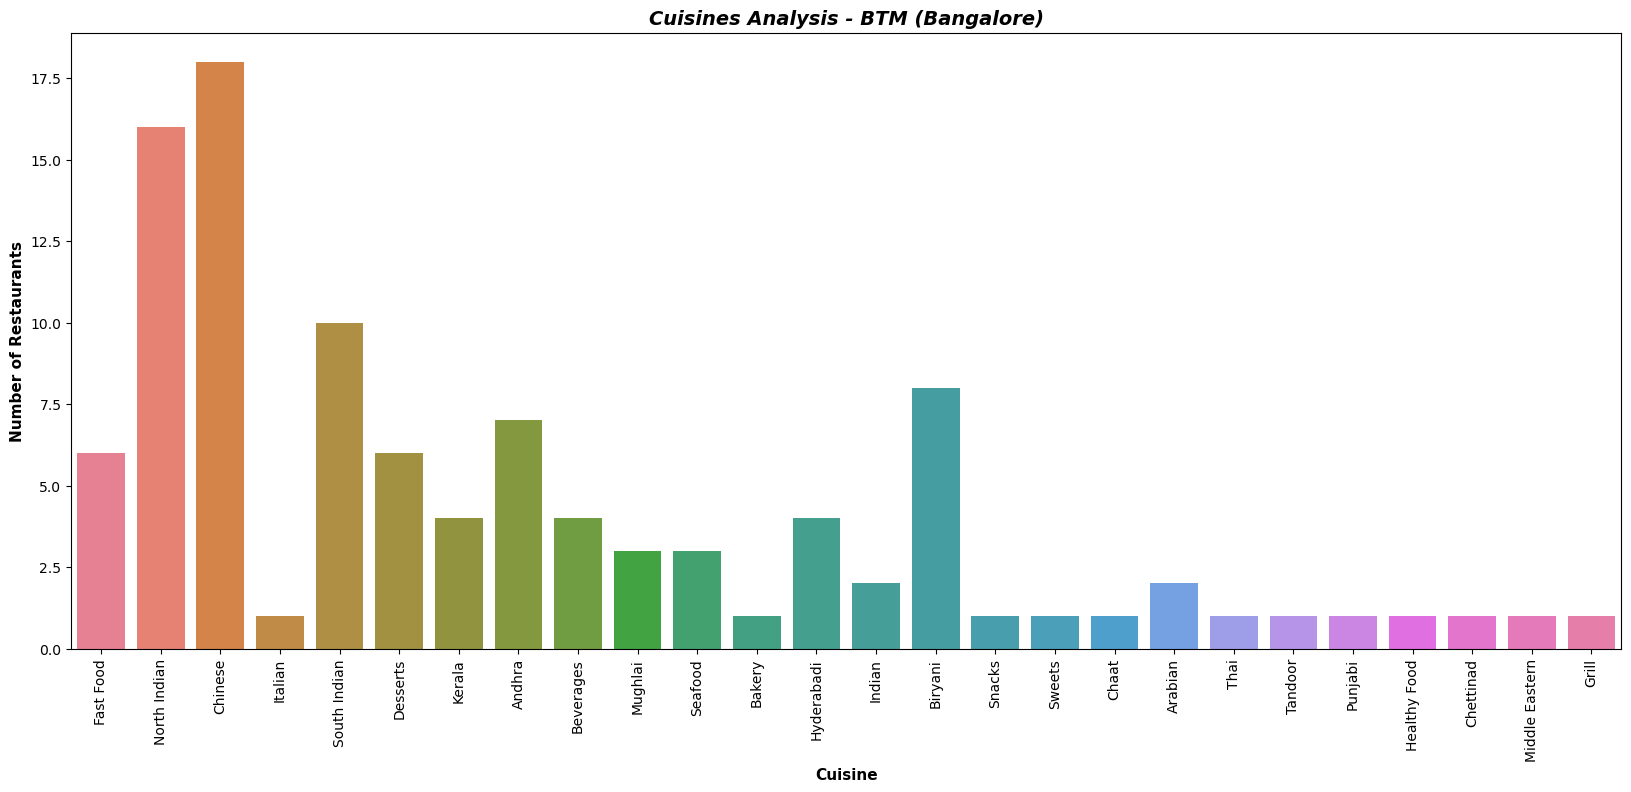

In [117]:
plt.figure(figsize = (20,8))
sns.barplot(
    x = df_Cuisine_BTM["Cuisine"],
    y = df_Cuisine_BTM["Count"],
    data = df_Cuisine_BTM, palette="husl"
)
plt.xticks(rotation = 90)
plt.title(
    "Cuisines Analysis - BTM (Bangalore)",
    fontsize = 14,
    fontweight = "bold",
    fontstyle = "italic",
    
)
plt.xlabel("Cuisine", fontsize = 11, fontweight = "bold")
plt.ylabel("Number of Restaurants", fontsize = 11, fontweight = "bold")
plt.show()

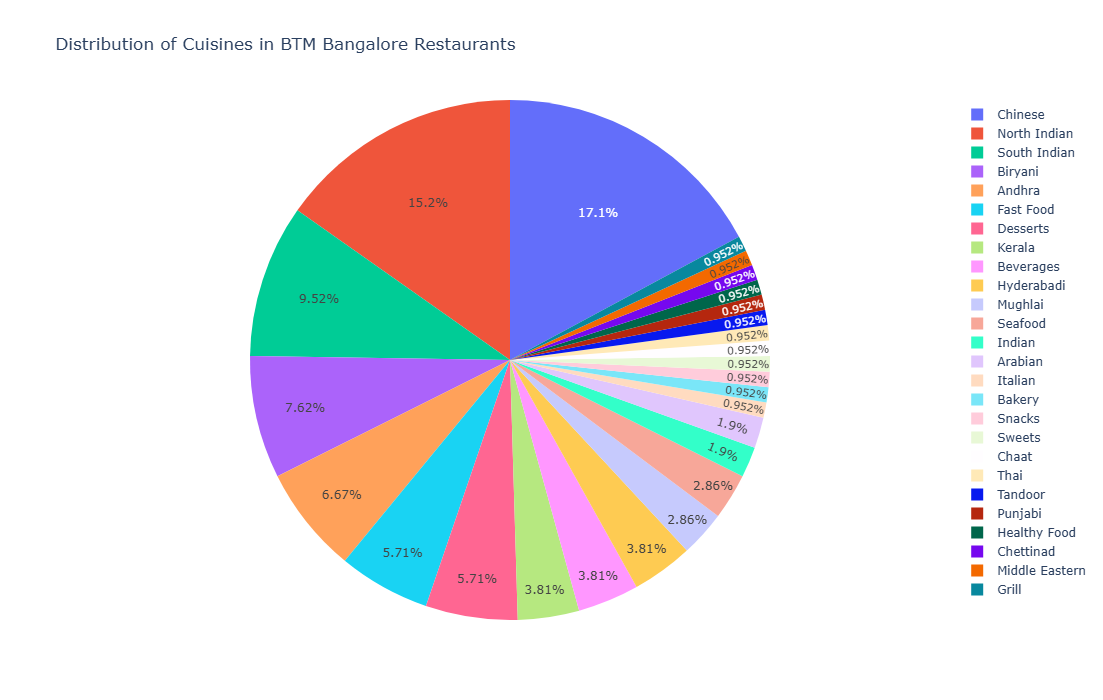

In [119]:
# Pie Chart
fig = px.pie(
    data_frame = df_Cuisine_BTM,
    names= df_Cuisine_BTM["Cuisine"],
    values = df_Cuisine_BTM["Count"],
    title = "Distribution of Cuisines in BTM Bangalore Restaurants", width = 700, height = 700
)
fig.update_traces(textposition = "inside")
fig.show()

In [121]:
# HSR 
freq_HSR = {}
for i in swiggy_HSR["Cuisine"].unique():
    Cuisine_List = i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_HSR:
            freq_HSR[Cuisine] = freq_HSR[Cuisine] + 1
        else:
            freq_HSR[Cuisine] = 1

print(freq_HSR)
print()
print(len(freq_HSR))

{'North Indian': 6, 'Home Food': 1, 'Thalis': 1, 'Combo': 1, 'American': 3, 'Arabian': 1, 'Chinese': 4, 'Desserts': 3, 'Fast Food': 1, 'Mughlai': 1, 'South Indian': 4, 'Kerala': 1, 'Indian': 1, 'Rajasthani': 1, 'Jain': 1, 'Biryani': 4, 'Turkish': 1, 'Portuguese': 1, 'Andhra': 1, 'Bakery': 1, 'Juices': 1, 'Kebabs': 1, 'Snacks': 1, 'Chettinad': 1}

24


In [124]:
Cuisine = freq_HSR.keys()
freq = freq_HSR.values()

dict_HSR = {"Cuisine" : Cuisine, "Count": freq}
df_Cuisine_HSR = pd.DataFrame(dict_HSR)
df_Cuisine_HSR.head()

,Cuisine,Count
0,North Indian,6
1,Home Food,1
2,Thalis,1
3,Combo,1
4,American,3


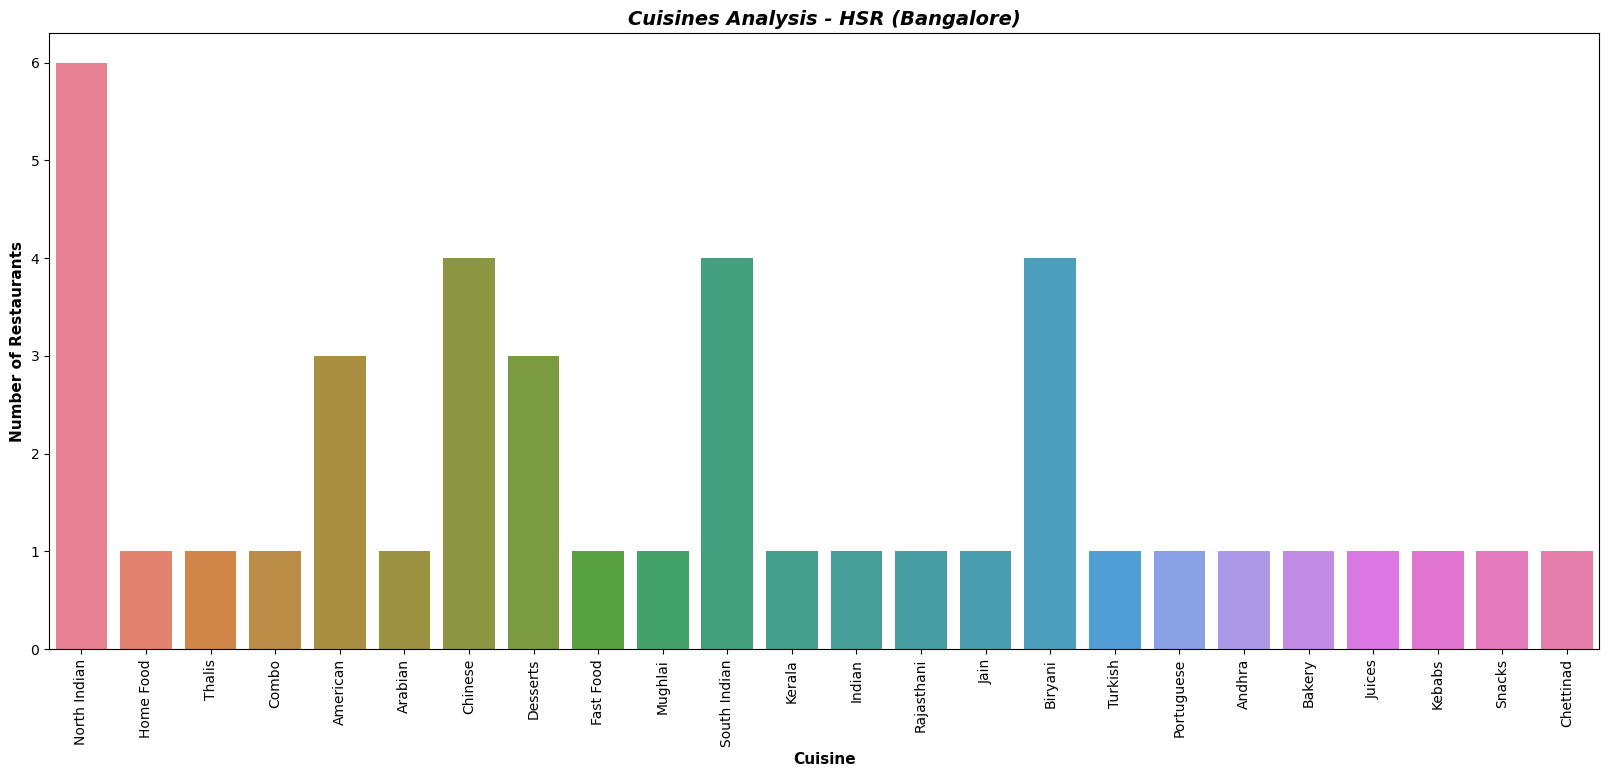

In [125]:
plt.figure(figsize = (20,8))
sns.barplot(
    x = df_Cuisine_HSR["Cuisine"],
    y = df_Cuisine_HSR["Count"],
    data = df_Cuisine_HSR, palette="husl"
)
plt.xticks(rotation = 90)
plt.title(
    "Cuisines Analysis - HSR (Bangalore)",
    fontsize = 14,
    fontweight = "bold",
    fontstyle = "italic",
    
)
plt.xlabel("Cuisine", fontsize = 11, fontweight = "bold")
plt.ylabel("Number of Restaurants", fontsize = 11, fontweight = "bold")
plt.show()

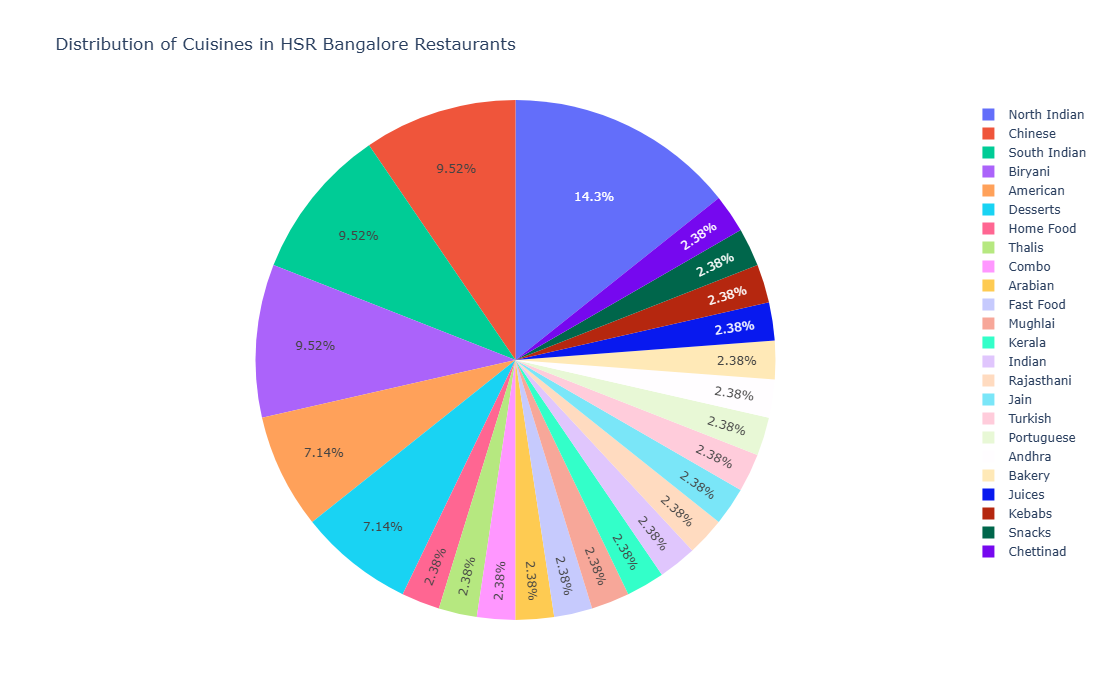

In [126]:
# Pie Chart
fig = px.pie(
    data_frame = df_Cuisine_HSR,
    names= df_Cuisine_HSR["Cuisine"],
    values = df_Cuisine_HSR["Count"],
    title = "Distribution of Cuisines in HSR Bangalore Restaurants", width = 700, height = 700
)
fig.update_traces(textposition = "inside")
fig.show()

In [129]:
# Koramangala
freq_koramangala = {}
for i in swiggy_koramangala["Cuisine"].unique():
    Cuisine_List = i.split(",")
    for Cuisine in Cuisine_List:
        Cuisine = Cuisine.lstrip()
        if Cuisine in freq_koramangala:
            freq_koramangala[Cuisine] = freq_koramangala[Cuisine] + 1
        else:
            freq_koramangala[Cuisine] = 1

print(freq_koramangala)
print()
print(len(freq_koramangala))

{'Sweets': 1, 'South Indian': 11, 'North Indian': 14, 'Fast Food': 9, 'Beverages': 5, 'Jain': 1, 'Chinese': 15, 'Thai': 2, 'Pizzas': 5, 'Italian': 4, 'Mexican': 3, 'Desserts': 8, 'Andhra': 5, 'Biryani': 10, 'Seafood': 5, 'Arabian': 1, 'Healthy Food': 3, 'American': 6, 'Snacks': 3, 'Mughlai': 3, 'Asian': 3, 'Continental': 3, 'Mediterranean': 1, 'Lebanese': 1, 'Bakery': 1, 'Cafe': 2, 'Salads': 2, 'Pastas': 1, 'Punjabi': 1, 'Hyderabadi': 1, 'Kerala': 1, 'Turkish': 1, 'Portuguese': 1, 'Grill': 1, 'Home Food': 1, 'Indian': 2, 'Ice Cream': 2, 'Juices': 1, 'Chaat': 1, 'Kebabs': 1, 'Pan-Asian': 2, 'Oriental': 1}

42


In [131]:
Cuisine = freq_koramangala.keys()
freq = freq_koramangala.values()

dict_koramangala = {"Cuisine" : Cuisine, "Count": freq}
df_Cuisine_koramangala = pd.DataFrame(dict_koramangala)
df_Cuisine_koramangala.head()

,Cuisine,Count
0,Sweets,1
1,South Indian,11
2,North Indian,14
3,Fast Food,9
4,Beverages,5


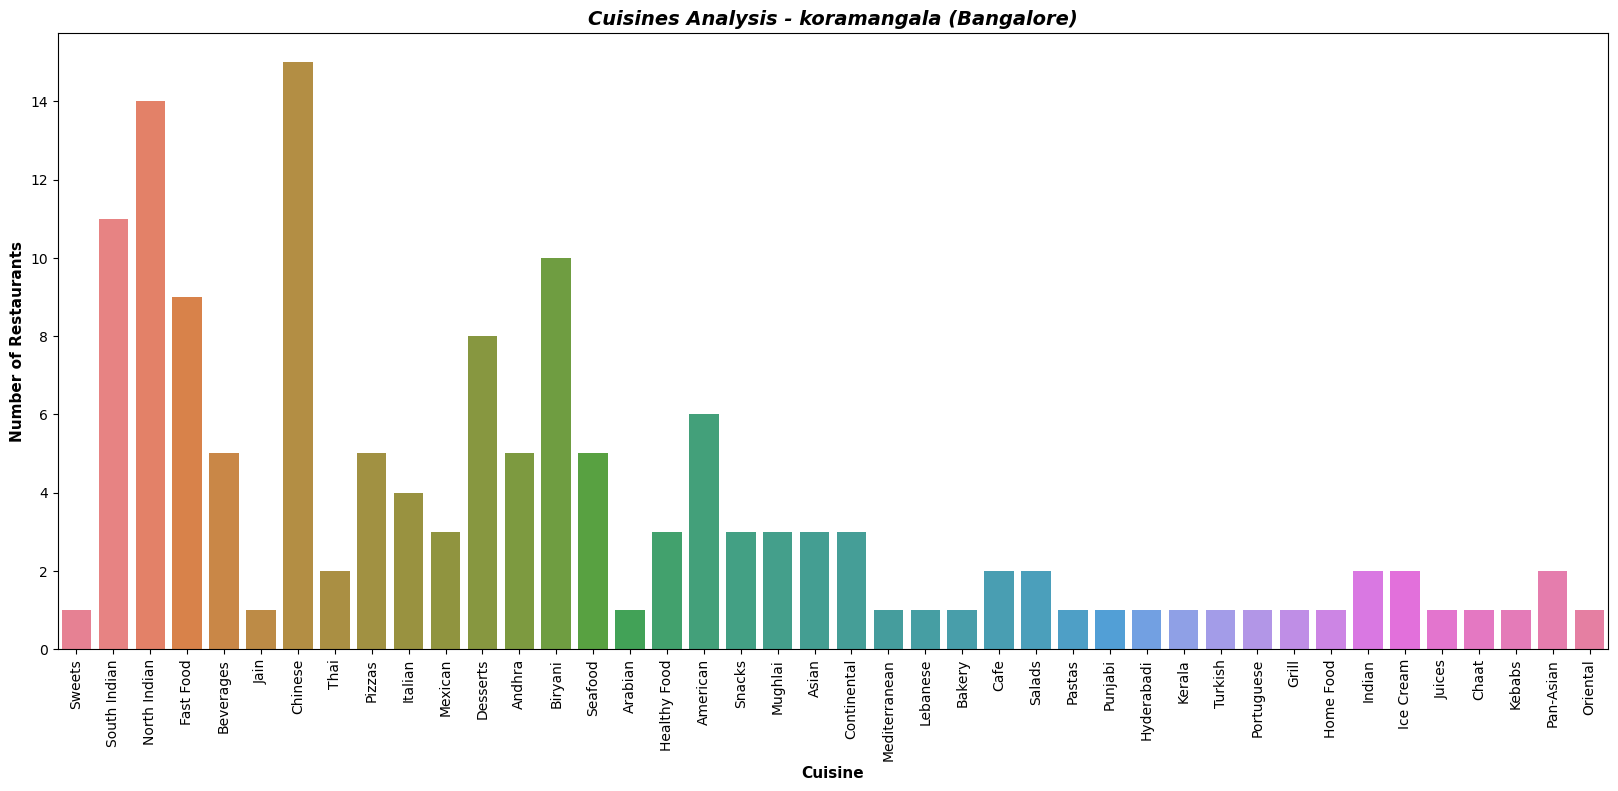

In [132]:
# Bar Chart
plt.figure(figsize = (20,8))
sns.barplot(
    x = df_Cuisine_koramangala["Cuisine"],
    y = df_Cuisine_koramangala["Count"],
    data = df_Cuisine_koramangala, palette="husl"
)
plt.xticks(rotation = 90)
plt.title(
    "Cuisines Analysis - koramangala (Bangalore)",
    fontsize = 14,
    fontweight = "bold",
    fontstyle = "italic",
    
)
plt.xlabel("Cuisine", fontsize = 11, fontweight = "bold")
plt.ylabel("Number of Restaurants", fontsize = 11, fontweight = "bold")
plt.show()

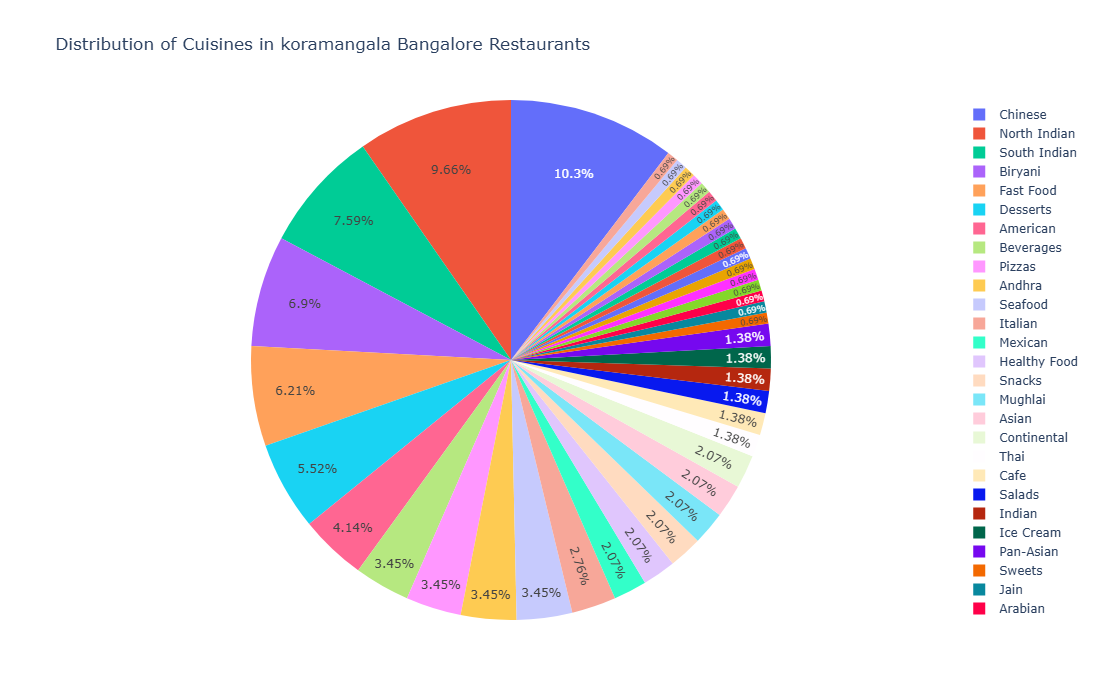

In [133]:
fig = px.pie(
    data_frame = df_Cuisine_koramangala,
    names= df_Cuisine_koramangala["Cuisine"],
    values = df_Cuisine_koramangala["Count"],
    title = "Distribution of Cuisines in koramangala Bangalore Restaurants", width = 700, height = 700
)
fig.update_traces(textposition = "inside")
fig.show()